In [15]:
import pandas as pd
import plotnine as pn
import numpy as np

In [7]:
df = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/multirun/universe=experiment_prohibition/prior=-8/utility=half_credit/agent_type=literal/analysis/all_data.csv") # least empirical
df

,complexity,simplicity,informativity,comm_cost,iff,sav,dlsav,deontic_priority,dp_trivial,dp_nontrivial,optimality,natural,dominant,name,dp
0,26,0.648649,0.404514,0.595486,0.000000,0.000000,False,True,False,True,0.771271,False,False,sampled_lang_6048,nontrivial
1,24,0.675676,0.697917,0.302083,0.857143,0.857143,False,True,False,True,0.857303,False,False,sampled_lang_21343,nontrivial
2,50,0.324324,0.491104,0.508896,0.222222,0.222222,False,True,False,True,0.555872,False,False,sampled_lang_27206,nontrivial
3,12,0.837838,0.537037,0.462963,0.666667,0.666667,False,False,False,False,0.917099,False,False,sampled_lang_4472,false
4,35,0.527027,0.550116,0.449884,0.700000,0.500000,False,True,False,True,0.706391,False,False,sampled_lang_32637,nontrivial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35145,20,0.729730,0.581597,0.418403,0.500000,0.500000,False,True,False,True,0.843059,False,False,sampled_lang_34635,nontrivial
35146,42,0.432432,0.622222,0.377778,0.800000,0.600000,False,True,False,True,0.685993,False,False,sampled_lang_33194,nontrivial
35147,20,0.729730,0.589815,0.410185,0.600000,0.600000,False,True,False,True,0.845866,False,False,sampled_lang_12579,nontrivial
35148,40,0.459459,0.536655,0.463345,0.600000,0.400000,False,True,False,True,0.658719,False,False,sampled_lang_32338,nontrivial


/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 56'. Pick better value with 'binwidth'.


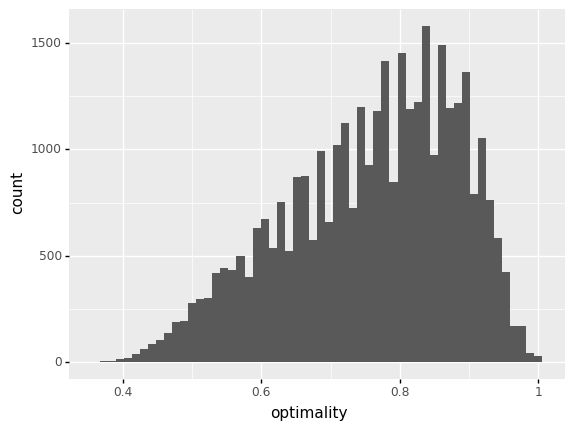

<ggplot: (359587291)>

In [8]:
(
    pn.ggplot(df)
    + pn.geom_histogram(pn.aes(x="optimality"))
)

In [60]:
(
    pn.ggplot(df)
    + pn.geom_histogram(pn.aes(x="optimality", fill="dp"), position="dodge")
)

In [51]:
# collect, for each tolerable level of efficiency loss, the proportion of langs satisfying DP. 

levels = np.linspace(df["optimality"].min(), df["optimality"].max(), num=10)
opt_bins = []
dp_props = []
for i in range(len(levels)-1):
    min = np.round(levels[i], 2)
    max = np.round(levels[i+1], 2)

    level_df = df[df["optimality"].between(min, max)]
    numdp = (level_df["deontic_priority"].value_counts().tolist()[0])

    dp_props.append(numdp / len(level_df))
    opt_bins.append((min, max))


levels_df = pd.DataFrame({"optimality_bin": opt_bins[5:], "prop_dp": dp_props[5:]})
levels_df

,optimality_bin,prop_dp
0,"(0.72, 0.79)",0.982533
1,"(0.79, 0.86)",0.946223
2,"(0.86, 0.93)",0.888720
3,"(0.93, 1.0)",0.902517


/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


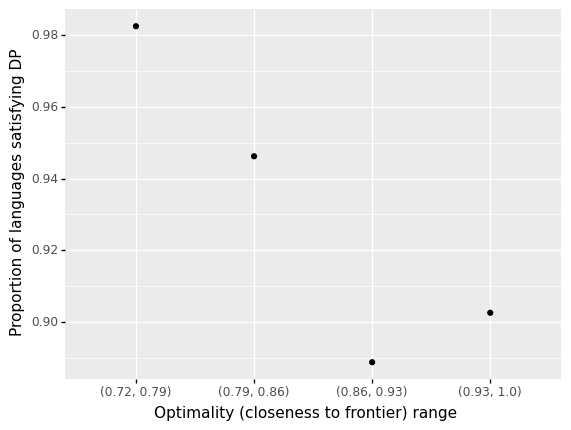

<ggplot: (391411220)>

In [59]:
(
    pn.ggplot(levels_df)
    + pn.geom_point(pn.aes(x="optimality_bin", y="prop_dp"))
    + pn.geom_line(pn.aes(x="optimality_bin", y="prop_dp"))
    + pn.ylab("Proportion of languages satisfying DP")
    + pn.xlab("Optimality (closeness to frontier) range")
)